# Analyzing climate change effects on Madagascar

In this jupyter notebook, we aim to analyze the climate change effects on Madagascar through the following research questions:
- What are significant trends over the past 20 years in the precipitation, temperature, and humidity in Madagascar? 
- How have these significant trends affected the livelihood of Madagascar? This is including but not limited to: the health of its inhabitants, natural disasters such as flooding, food security, and biodiversity levels. 


## Overview of datasets:
- First dataset (Climate change Madagascar): [https://www.kaggle.com/brsdincer/climate-change-madagascar-turkey-nasa](https://www.kaggle.com/brsdincer/climate-change-madagascar-turkey-nasa)
- Second dataset (Climate historical data): [https://climateknowledgeportal.worldbank.org/country/madagascar/climate-data-historical](https://climateknowledgeportal.worldbank.org/country/madagascar/climate-data-historical) Note that we might not use this dataset
- Third dataset (Climate change indicators): [https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-madagascar](https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-madagascar)
- Fourth dataset (Food security)- [https://data.world/wfp/9bd73ae5-0f0a-4f7d-a66c-9d7c4569cfcd](https://data.world/wfp/9bd73ae5-0f0a-4f7d-a66c-9d7c4569cfcd)

In [1]:
# Install new packages, need to uncomment this for the first time
#pip install netCDF4

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

Helpful link dealing with nc4 data: https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648

In [2]:
# Read in the first dataset
file_path_header = "data/firstDataset/AUG_1_2021_CLIMATE_CHANGE_COMPARING/MADAGASCAR/2021_AUG_1/"
file_names = ["tavg1_2d_flx_Nx-202108251432output.10532.webform.nc4", "tavg1_2d_lnd_Nx-202108251427output.8348.webform.nc4", "tavg1_2d_ocn_Nx-202108251420output.5096.webform.nc4", "tavg1_2d_rad_Nx-202108251429output.8623.webform.nc4", "tavg1_2d_slv_Nx-202108251418output.3443.webform.nc4", "tavg3_2d_aer_Nx-202108251425output.5858.webform.nc4", "tavg3_2d_chm_Nx-202108251422output.5477.webform.nc4"]
list_ds = []
for file_name in file_names:
    list_ds.append(nc.Dataset(file_path_header + file_name))
print(list_ds)


[<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(33), latitude(63)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 rhoa(time, latitude, longitude)
    groups: , <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(33), latitude(63)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 prectot(time, latitude, longitude), float32 prmc(time, latitude, longitude), float32 grn(time, latitude, longitude), float32 evland(time, latitude, longitude), float32 teland(time, latitude, longitude), float32 evpintr(time, la

In [3]:
# Read in the second Dataset- appears to not really be a way this data is sorted, so we might not want to use it
with open("data/ctmp6190/ctmp6190.dat") as f:
    for line in f:
        print(line)
x = np.fromfile("data/ctmp6190/ctmp6190.dat")
print(x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  196  192  190  181  170  156  183  171  190  196  202  187  165  111   95  119  189  209  209  193  168  162  168  193  209  224  232  208  169  174  183  203  209  202  199  201  206  206  211  212  216  216  214  209  185  173  176  148  178  161  170  174  163  170  210  214  215  214  215  216  220-9999-9999-9999-9999  218  211  220  226  230-9999-9999-9999-9999-9999  236  238  238  238  236  235  234  234  234  234  235  238  242  244  245  249  249  250  252  253  254  256-9999-9999-9999-9999-9999-9999-9999  259  262  267  267  268  267  266  262  263  263  261  262  259  263  271  272  272  273  274  272  272  273  274  272  272  273  272  272  272  269  267  263  262  261  261  258  253  251  251  251  248  244  250  248  254  254  254  253  252  250  250  247  243  240  237  232  222  196  153  181  229  148  255  265  272  274  271  269  271  268  265  250  246  234  222  214  197  204  206  208  196  179  164  139  117  153  155  135  130  105  146  111  135  165  192  193

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




  123  120  115  112  109  109  120  121  123  125  125  125  122  121  124  121  118  116  110  109  113  116  115  114  113  111  110  113  120  125  130  130  124  125  133  133  134  138  145  142  139  139  138  137  135  135  138  139  139  141  144  146  146  150  150  148  142  138  132  131  142  147  146  128  141  154  132  110  107  145  106  104  110  109  105  117  121  121  120  120  119  117  117  120  120  123  123  125  126  128  129  132  130  132  135  143  153-9999-9999-9999-9999  165  146  117   70   63   55   53   55   58   57   60   45   25   23   46  103  130  134  120   76   66   85  114  114   99   89   77   78  100  101   92   64   52   93  146  141  112  115  136  149  146  145  146  147  149  149  151  152  153  152  154  153  152  149  148  149  150  143  126  120   93   64   34  -27  -95 -103 -112 -101 -110 -107  -96 -107  -93 -102  -91  -70  -53  -45  -67  -70  -48  -58  -51  -78  -61  -49  -51  -26  -18   36   12  -47  -64  -52  -30  -40  -31   -3  -4

-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999  230  220  214  222  200  196  203  203  204  206  214  216  211  215  221  225  227  231  230  234  236  234  233  230  233  232  231  229  226  226  229  227  223  221  221  214  221  230  233  245  239  230  236  225  249  253  234  239  247  243  249  255  256  260  266  266  267  276-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999  270  259  238  219  244  263-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999-9999

In [4]:
# Read in third dataset
climate_change_indicators = pd.read_csv("data/climate-change_mdg.csv")
climate_change_indicators.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Madagascar,MDG,2018,Agricultural land (sq. km),AG.LND.AGRI.K2,408950
2,Madagascar,MDG,2017,Agricultural land (sq. km),AG.LND.AGRI.K2,408950
3,Madagascar,MDG,2016,Agricultural land (sq. km),AG.LND.AGRI.K2,408950
4,Madagascar,MDG,2015,Agricultural land (sq. km),AG.LND.AGRI.K2,408950


In [5]:
# Read in the fourth dataset about food security
food_security = pd.read_csv("data/food_security/pblstatssum-2.csv")
food_security.head()

,SvyDate,ADM0_NAME,ADM1_NAME,ADM2_NAME,AdminStrata,Variable,VariableDescription,Demographic,Mean
0,#date,#country+name,#adm1+name,#adm2+name,#loc+name,#indicator+code,#indicator+name,#category,#indicator+value+num
1,2016-05-01T00:00:00,Madagascar,NaN,NaN,Analamanga,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.15652
2,2016-05-01T00:00:00,Madagascar,NaN,NaN,Androy,BorrowOrHelp,# of days household using this coping strategy...,NaN,2.34211
3,2016-05-01T00:00:00,Madagascar,NaN,NaN,Anosy,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.7561
4,2016-05-01T00:00:00,Madagascar,NaN,NaN,Atsinanana,BorrowOrHelp,# of days household using this coping strategy...,NaN,1.49296


# Other datasets and factors
From the links, [https://madagascar.opendataforafrica.org/tkkbtv/world-development-indicators-wdi-november-2014](https://madagascar.opendataforafrica.org/tkkbtv/world-development-indicators-wdi-november-2014) and [https://www.gbif.org/occurrence/search?country=MG](https://www.gbif.org/occurrence/search?country=MG), we can filter for different datasets based on Madagascar that we decide we want to use

# Analyzing the data

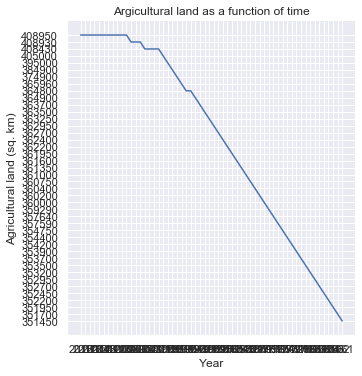

In [7]:
argi = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Agricultural land (sq. km)"]
argi["Year"].astype(int)
argi["Value"].astype(int)
#argi["Year"] = argi["Year"].astype(int)
#argi.loc[:, 'Year'] = argi["Year"].astype(int)
#argi.loc[:, 'Value'] = argi["Value"].astype(int)
#argi["Value"] = argi["Value"].astype(int)
graph = sns.relplot(data=argi, x="Year", y="Value", kind="line")
graph.set(ylabel="Agricultural land (sq. km)", title="Argicultural land as a function of time")

<ipython-input-8-ae29f16d6472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_area["Year"] = forest_area["Year"].astype(int)
<ipython-input-8-ae29f16d6472>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_area["Value"] = forest_area["Value"].astype(float)


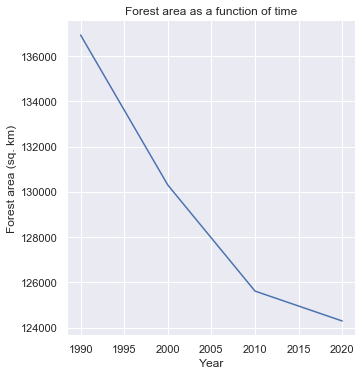

In [8]:
forest_area = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Forest area (sq. km)"]
forest_area["Year"] = forest_area["Year"].astype(int)
forest_area["Value"] = forest_area["Value"].astype(float)
graph = sns.relplot(data=forest_area, x="Year", y="Value", kind="line")
graph.set(ylabel="Forest area (sq. km)", title="Forest area as a function of time")

<ipython-input-14-0a7515d09dbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_growth["Year"] = population_growth["Year"].astype(int)
<ipython-input-14-0a7515d09dbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_growth["Value"] = population_growth["Value"].astype(float)
No handles with labels found to put in legend.


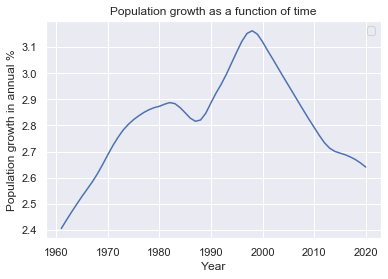

In [14]:
population_growth = climate_change_indicators[climate_change_indicators["Indicator Name"]=="Population growth (annual %)"]
population_growth["Year"] = population_growth["Year"].astype(int)
population_growth["Value"] = population_growth["Value"].astype(float)

plt.plot(population_growth["Year"], population_growth["Value"])
plt.xlabel("Year")
plt.ylabel("Population growth in annual %")
plt.title("Population growth as a function of time")
plt.legend()
plt.show()

<ipython-input-10-bc24be05176d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_portion_size["Mean"] = limited_portion_size["Mean"].astype(float)


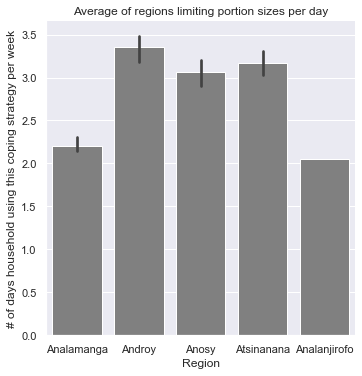

In [10]:
limited_portion_size = food_security[(food_security["Variable"]=="LimitPortionSize")]
limited_portion_size["Mean"] = limited_portion_size["Mean"].astype(float)
graph = sns.catplot(x="AdminStrata", y="Mean", kind="bar", data=limited_portion_size, color="gray")
graph.set(ylabel="# of days household using this coping strategy per week", xlabel="Region", title="Average of regions limiting portion sizes per day")

<ipython-input-13-a413f4b99597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restrict_consumption["Mean"] = restrict_consumption["Mean"].astype(float)
No handles with labels found to put in legend.


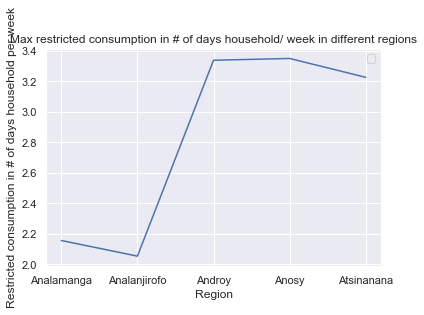

In [13]:
restrict_consumption = food_security[food_security["Variable"]=="RestrictConsumption"]
restrict_consumption["Mean"] = restrict_consumption["Mean"].astype(float)

grouped = restrict_consumption.groupby("AdminStrata")["Mean"].max()
plt.plot(grouped.index, grouped.values)
plt.ylabel("Restricted consumption in # of days household per week")
plt.xlabel("Region")
plt.title("Max restricted consumption in # of days household/ week in different regions")
plt.legend()
plt.show()